In [1]:
from qiskit import QuantumCircuit, Aer, assemble
from math import pi
import numpy as np
from qiskit.visualization import plot_bloch_multivector, plot_histogram, array_to_latex

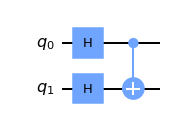

In [2]:
# we also put the second qubit in superposition
qc = QuantumCircuit(2)
qc.h(0)
qc.h(1)
qc.cx(0,1)
qc.draw()

/opt/conda/lib/python3.8/site-packages/qiskit/utils/deprecation.py:62: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.9.0 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  return func(*args, **kwargs)


<IPython.core.display.Latex object>

/opt/conda/lib/python3.8/site-packages/qiskit/visualization/bloch.py:69: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  x_s, y_s, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


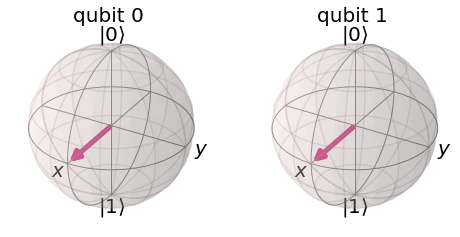

In [3]:
# Let's see the result
svsim = Aer.get_backend('aer_simulator')
qc.save_statevector()
qobj = assemble(qc)
final_state = svsim.run(qobj).result().get_statevector()
display(array_to_latex(final_state, prefix="\\text{Statevector} = "))
plot_bloch_multivector(final_state)

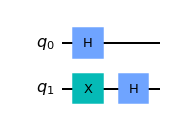

In [4]:
#put the target qubit in a negative pahse 
qc = QuantumCircuit(2)
qc.h(0)
qc.x(1)
qc.h(1)
qc.draw()

<IPython.core.display.Latex object>

/opt/conda/lib/python3.8/site-packages/qiskit/visualization/bloch.py:69: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  x_s, y_s, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


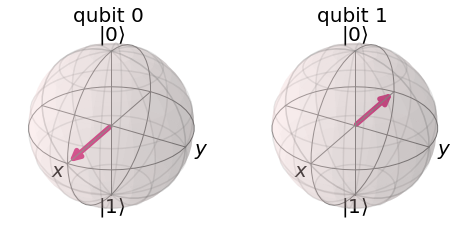

In [5]:
qc1 = qc.copy()
qc1.save_statevector()
final_state = svsim.run(qc1).result().get_statevector()
display(array_to_latex(final_state, prefix="\\text{Statevector} = "))
plot_bloch_multivector(final_state)

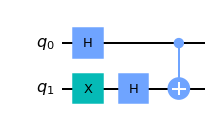

In [6]:
# now we apply the CNOT gate on this new circuit
qc = QuantumCircuit(2)
qc.h(0)
qc.x(1)
qc.h(1)
qc.draw()
qc.cx(0,1)
display(qc.draw())

/opt/conda/lib/python3.8/site-packages/qiskit/utils/deprecation.py:62: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.9.0 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  return func(*args, **kwargs)


<IPython.core.display.Latex object>

/opt/conda/lib/python3.8/site-packages/qiskit/visualization/bloch.py:69: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  x_s, y_s, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


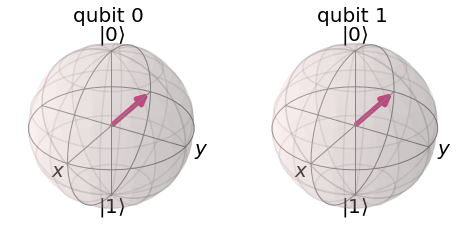

In [7]:
# we can see that the control qubit has his state changed but not the target one
qc.save_statevector()
qobj = assemble(qc)
final_state = svsim.run(qobj).result().get_statevector()
display(array_to_latex(final_state, prefix="\\text{Statevector} = "))
plot_bloch_multivector(final_state)

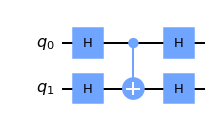

/opt/conda/lib/python3.8/site-packages/qiskit/utils/deprecation.py:62: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.9.0 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  return func(*args, **kwargs)


<IPython.core.display.Latex object>

In [8]:
# now we add one handamard gate on each qubit after the CNOT gate to change the phase of PI/2 
qc = QuantumCircuit(2)
qc.h(0)
qc.h(1)
qc.cx(0,1)
qc.h(0)
qc.h(1)
display(qc.draw()) 

qc.save_unitary()
usim = Aer.get_backend('aer_simulator')
qobj = assemble(qc)
unitary = usim.run(qobj).result().get_unitary()
array_to_latex(unitary, prefix="\\text{Circuit = }\n")

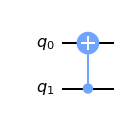

<IPython.core.display.Latex object>

In [9]:
#one other circuit with a CNOT inverted ( q1 control, q0 target)
#we can see that the result is the same than the circuit above.
#so if we add handamard gate before the CNOT gate and after to pivote the phase 
# we get an inverted CNOT gate, we did a phase kickback
qc = QuantumCircuit(2)
qc.cx(1,0)
display(qc.draw())
qc.save_unitary()

qobj = assemble(qc)
unitary = usim.run(qobj).result().get_unitary()
array_to_latex(unitary, prefix="\\text{Circuit = }\n")

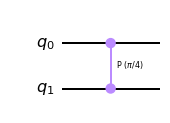

In [10]:
qc = QuantumCircuit(2)
qc.cp(pi/4, 0, 1)
qc.draw()

In [11]:
# See Results:
qc.save_unitary()
qobj = assemble(qc)
unitary = usim.run(qobj).result().get_unitary()
array_to_latex(unitary, prefix="\\text{Controlled-T} = \n")

<IPython.core.display.Latex object>

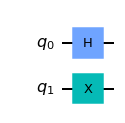

/opt/conda/lib/python3.8/site-packages/qiskit/visualization/bloch.py:69: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  x_s, y_s, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


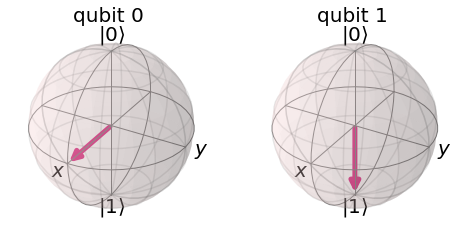

In [12]:
qc = QuantumCircuit(2)
qc.h(0)
qc.x(1)
display(qc.draw())
# See Results:
qc.save_statevector()
qobj = assemble(qc)
final_state = svsim.run(qobj).result().get_statevector()
plot_bloch_multivector(final_state)

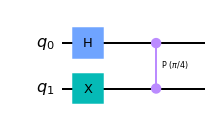

/opt/conda/lib/python3.8/site-packages/qiskit/utils/deprecation.py:62: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.9.0 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  return func(*args, **kwargs)
/opt/conda/lib/python3.8/site-packages/qiskit/visualization/bloch.py:69: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  x_s, y_s, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


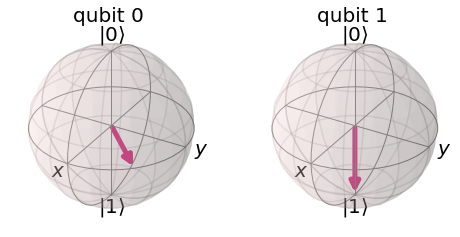

In [13]:
# we apply the T-Gate on the qubit 1 to add a phase of eiπ/4
# we can see that it change the relative phase of the qubit 0 
# this is observable on the bloch sphere, there is no change for qubit 1
qc = QuantumCircuit(2)
qc.h(0)
qc.x(1)
# Add Controlled-T
qc.cp(pi/4, 0, 1)
display(qc.draw())
# See Results:
qc.save_statevector()
qobj = assemble(qc)
final_state = svsim.run(qobj).result().get_statevector()
plot_bloch_multivector(final_state)

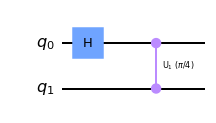

/opt/conda/lib/python3.8/site-packages/qiskit/utils/deprecation.py:62: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.9.0 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  return func(*args, **kwargs)
/opt/conda/lib/python3.8/site-packages/qiskit/visualization/bloch.py:69: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  x_s, y_s, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


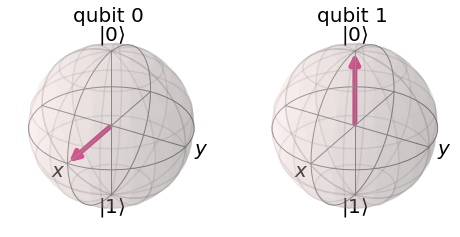

In [17]:
# we apply the U-Gate on the qubit 1 to add a phase of π/4
# we can see that it change the relative phase of the qubit 0 
# this is observable on the bloch sphere, there is no change for qubit 1
qc = QuantumCircuit(2)
# Add Controlled-U1
qc.h(0)
qc.cu1(pi/4, 0, 1)
display(qc.draw())
# See Results:
qc.save_statevector()
qobj = assemble(qc)
final_state = svsim.run(qobj).result().get_statevector()
plot_bloch_multivector(final_state)

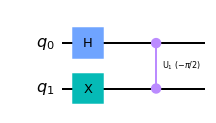

/opt/conda/lib/python3.8/site-packages/qiskit/utils/deprecation.py:62: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.9.0 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  return func(*args, **kwargs)
/opt/conda/lib/python3.8/site-packages/qiskit/visualization/bloch.py:69: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  x_s, y_s, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


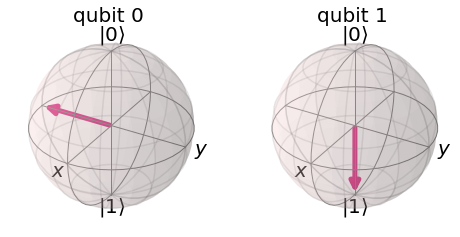

In [16]:
# we apply the U-Gate on the qubit 1 to add a phase of π/4
# we can see that it change the relative phase of the qubit 0 
# this is observable on the bloch sphere, there is no change for qubit 1
qc = QuantumCircuit(2)
# Add Controlled-U1
qc.h(0)
qc.x(1)
qc.cu1(-pi/2, 0, 1)
display(qc.draw())
# See Results:
qc.save_statevector()
qobj = assemble(qc)
final_state = svsim.run(qobj).result().get_statevector()
plot_bloch_multivector(final_state)

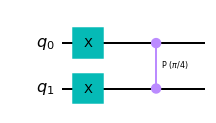

/opt/conda/lib/python3.8/site-packages/qiskit/utils/deprecation.py:62: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.9.0 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  return func(*args, **kwargs)
/opt/conda/lib/python3.8/site-packages/qiskit/visualization/bloch.py:69: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  x_s, y_s, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


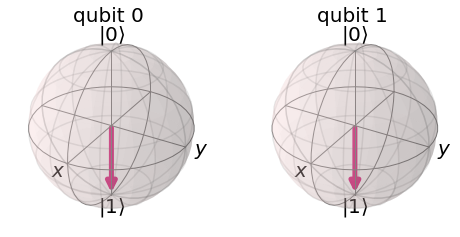

In [18]:
# we apply the T-Gate on the qubit 1 to add a phase of eiπ/4
#both qubit are in state 1
# there is no change because qubit was not put in superposition state
qc = QuantumCircuit(2)
qc.x(0)
qc.x(1)
# Add Controlled-T
qc.cp(pi/4, 0, 1)
display(qc.draw())
# See Results:
qc.save_statevector()
qobj = assemble(qc)
final_state = svsim.run(qobj).result().get_statevector()
plot_bloch_multivector(final_state)